**Name:** Julian Le

**Kaggle Dataset:** https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

1. Import the libraries

In [279]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Import the dataset

In [280]:
# load dataset 
df_train = pd.read_csv('train.csv')  
df_test = pd.read_csv('test.csv')  

In [281]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [282]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [283]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Let's find out the correlations of each column and the sale price

In [284]:
correlations = df_train.corr()['SalePrice']

print(correlations.sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

The column OverallQual has the strongest correlation. So let's choose it for the simple linear regression

In [285]:
columns = ["OverallQual", "SalePrice"]

In [286]:
df_train[columns]

,OverallQual,SalePrice
0,7,208500
1,6,181500
2,7,223500
3,7,140000
4,8,250000
...,...,...
1455,6,175000
1456,6,210000
1457,7,266500
1458,5,142125


3. Creating Data Frames

In [287]:
# Creating Data Frames
X = df_train[['OverallQual']]  # select the 'overallQual' column as the feature
y = df_train['SalePrice']  # select the 'salePrice' column as the target

4. Dataset Splition

In [288]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 1/3, random_state = 0) 

5. Modelling

In [289]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [290]:
X_test = df_test[["OverallQual"]]

6. Predictions

In [291]:
# Predicting the Test set results
y_pred = linear_regressor.predict(X_test)

In [292]:
y_pred

array([131869.91901518, 177290.32109094, 131869.91901518, ...,
       131869.91901518, 131869.91901518, 222710.7231667 ])

In [293]:
# Create a new dataframe with the predicted 'salePrice' values and their corresponding 'ID' values
df_predictions = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred})

# Export the dataframe to a CSV file
df_predictions.to_csv('predictions_simple_linear_regression.csv', index=False)

### Using the multiple linear regression technique

In this model, I will choose the columns that have the correlation scores of at least 0.5

In [294]:
columns_mlr = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]

Create Dataframe

In [303]:
# Creating Data Frames
X = df_train[columns_mlr]
y = df_train["SalePrice"]

In [304]:
X

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,856,856,2,8,2003,2003
1,6,1262,2,1262,1262,2,6,1976,1976
2,7,1786,2,920,920,2,6,2001,2002
3,7,1717,3,756,961,1,7,1915,1970
4,8,2198,3,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,953,2,7,1999,2000
1456,6,2073,2,1542,2073,2,7,1978,1988
1457,7,2340,1,1152,1188,2,9,1941,2006
1458,5,1078,1,1078,1078,1,5,1950,1996


Dataset Splition

In [305]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 1/3, random_state = 0) 

### Modelling

In [306]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

### predictions

In [307]:
# Predicting the Test set results
y_pred = linear_regressor.predict(X_test)

In [308]:
y_pred

array([269353.69799229, 150864.43264208, 110227.57571862, 228138.25180835,
       121104.44650826, 114507.10407447, 256952.47515824, 133443.08617777,
       497931.5144567 , 163853.27637544, 215310.03781218, 194072.65729372,
       230371.24280942, 104732.55701113, 132955.54383101, 144046.5046626 ,
       217194.39699436, 102383.19043716, 151285.2429389 , 193436.80066438,
       129330.73083328, 152919.96064663, 106998.24039506, 168722.9197766 ,
       188779.29997905, 202261.88066278, 180740.51782477,  51581.1275631 ,
       297791.21635725, 111124.02991107, 198850.15715265, 208381.59760767,
       143049.93038024, 280614.96983865, 317309.2110996 , 186898.83299982,
       271570.68312453, 119187.32835865, 237069.44942864, 306016.52185582,
       233559.77269168, 129266.52495441, 209380.31668877, 293230.45234587,
       328534.3314539 , 179108.93817707, 115552.17054598, 111103.3559348 ,
       180234.07504495,  68132.73270153, 347342.19443383, 134480.70567458,
       178069.68586518,  

### Performance Evaluations

In [309]:
# Importing metrics library
from sklearn import metrics
# Evaluating the model and printing the results using MAE
print(metrics.mean_absolute_error(y_test, y_pred))

# Evaluating the model and printing the results using MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Importing the math library
import math

# Evaluating the model and printing the results using RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

23747.858663690746
1824552491.7519958
42714.78071759231


### Impoort the prediction for df test

In [310]:
df_test = pd.read_csv('test.csv')  

In [312]:
input_test = df_test[columns_mlr].fillna(df_test.mean())
y_pred = linear_regressor.predict(input_test)

/var/folders/bs/qfl9ywrn26v4bm2ddlmj87yw0000gn/T/ipykernel_35806/2711002027.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  input_test = df_test[columns_mlr].fillna(df_test.mean())


In [313]:
y_pred

array([102114.59379348, 163487.29574013, 171530.40396392, ...,
       157226.3894138 , 114354.81539259, 240281.438962  ])

In [314]:
# Create a new dataframe with the predicted 'salePrice' values and their corresponding 'ID' values
df_predictions = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred})

# Export the dataframe to a CSV file
df_predictions.to_csv('predictions_mlp.csv', index=False)

## Polynomial Regression

In [315]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the dataset

In [316]:
df_train = pd.read_csv('train.csv')  
df_test = pd.read_csv('test.csv')  

Create DataFrame

In [330]:
columns_poly = ["OverallQual"]

In [331]:
X = df_train[columns_poly]
y = df_train["SalePrice"]

#### Create Polynomial regressor

In [350]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

#### Training the Polynomial Regression model on the whole dataset

In [351]:
#Training the Polynomial Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
Poly_reg_model = LinearRegression()
Poly_reg_model.fit(X_poly, y)

LinearRegression()

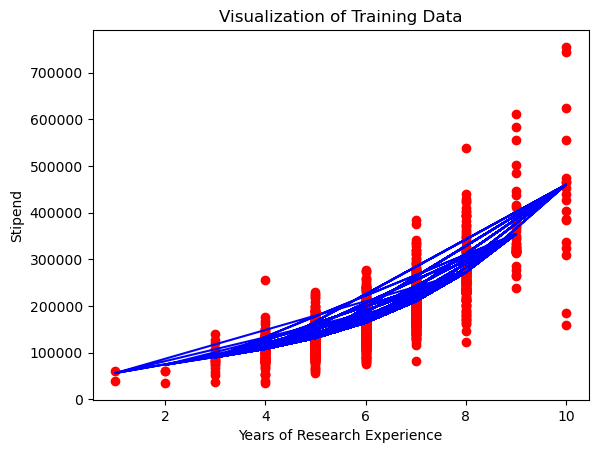

In [352]:
# Visualising the Training set results
plt.scatter(X, y, color = 'red')
plt.title('Visualization of Training Data')
plt.xlabel('Years of Research Experience')
plt.ylabel('Stipend')
plt.plot(X, Poly_reg_model.predict(X_poly), color = 'blue')

In [355]:
input_test = poly_reg.fit_transform(df_test[["OverallQual"]])
y_pred = Poly_reg_model.predict(input_test)

### Export the results

In [356]:
# Create a new dataframe with the predicted 'salePrice' values and their corresponding 'ID' values
df_predictions = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred})

# Export the dataframe to a CSV file
df_predictions.to_csv('predictions_poly_reg.csv', index=False)

#### Now let's train the model using 3 input classes

In [369]:
columns_poly = ["OverallQual", "GrLivArea", "GarageCars"]

In [370]:
X = df_train[columns_poly]
y = df_train["SalePrice"]

In [371]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

In [372]:
#Training the Polynomial Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
Poly_reg_model = LinearRegression()
Poly_reg_model.fit(X_poly, y)

LinearRegression()

In [377]:
input_test = poly_reg.fit_transform(df_test[columns_poly].fillna(df_test.mean()))
y_pred = Poly_reg_model.predict(input_test)

/var/folders/bs/qfl9ywrn26v4bm2ddlmj87yw0000gn/T/ipykernel_35806/3171186008.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  input_test = poly_reg.fit_transform(df_test[columns_poly].fillna(df_test.mean()))


#### Export the reults

In [378]:
# Create a new dataframe with the predicted 'salePrice' values and their corresponding 'ID' values
df_predictions = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred})

# Export the dataframe to a CSV file
df_predictions.to_csv('predictions_poly_reg_3_input_attributes.csv', index=False)